## A view into the energy consumption of Slovenia by type of energy source and usage yearly
Data mining, project, `12.4.2022`  
**`Marta Rašeta`, `Tilen Berlak`, `Aladin Ćemalović`**

In [102]:
#Preparing the data


#Replace the unknown/null values with -1 to be able to put them into a numpy matrix
with open("usage_data.csv") as f_input:
    text = [l.replace("-", "-1") for l in f_input]
import numpy as np
usage_data= np.loadtxt(text, delimiter=",", dtype="float")


column_names = []
row_names = []
#Get the column and row names 
f = open("usage_headers.csv", "r")
column_names=f.readline().strip().split(",")

for x in f:
    row_names.append(x.strip())
row_names=np.array(row_names)    

In [103]:
import matplotlib.pyplot as plt

w=int(len(column_names)/10)
h=len(row_names)-1

matrix = [[0 for x in range(h)] for y in range(w)] 


for year in range(w):
    count=0
    for x in usage_data[1:,year*10]:

        matrix[year][count]=x
        count+=1
  
npmat =np.array(matrix)


#Delete unnecessary metrics
names=np.delete(row_names,[0,5],0)

npmat=np.delete(npmat,4,axis=1)

npmat[npmat==-1]=np.nan




In [104]:
print(npmat)
print(row_names)

[[3.6512e+04 2.1000e+01 7.8580e+03 2.0850e+03 1.1150e+03 9.1900e+02
  9.6500e+02 7.7600e+02 1.0000e+02 2.1800e+02 2.1900e+02 2.8500e+02
  9.8600e+02]
 [4.0115e+04 2.8000e+01 7.9600e+03 2.0830e+03 1.1220e+03 9.0400e+02
  9.5800e+02 7.4200e+02 1.1300e+02 2.3700e+02 2.4600e+02 2.8900e+02
  1.0290e+03]
 [3.7904e+04 3.1000e+01 7.8350e+03 2.0790e+03 1.1270e+03 8.9200e+02
  9.4600e+02 7.0900e+02 1.2600e+02 2.5600e+02 2.7300e+02 3.0100e+02
  1.2460e+03]
 [4.2177e+04 1.1400e+02 7.8220e+03 2.0610e+03 1.1270e+03 8.7900e+02
  9.1700e+02 6.7200e+02 1.3800e+02 2.7000e+02 3.0400e+02 3.1700e+02
  2.0180e+03]
 [4.0946e+04 3.9000e+01 7.7940e+03 2.0430e+03 1.1230e+03 8.6800e+02
  8.8500e+02 6.4300e+02 1.4800e+02 2.8300e+02 3.3300e+02 3.3300e+02
  2.1050e+03]
 [4.3434e+04 5.4000e+01 7.9140e+03 2.0240e+03 1.1170e+03 8.5400e+02
  8.5000e+02 6.0800e+02 1.5800e+02 2.9500e+02 3.5500e+02 3.5100e+02
  1.8170e+03]
 [3.9402e+04 1.1800e+02 7.8380e+03 2.0030e+03 1.0960e+03 8.3800e+02
  8.1300e+02 5.7500e+02 1.6800e+

#### What is the average consumption of all energy consumers?
For this question we will calculate the average energy consumption for every usage and represent the data on a barplot. 

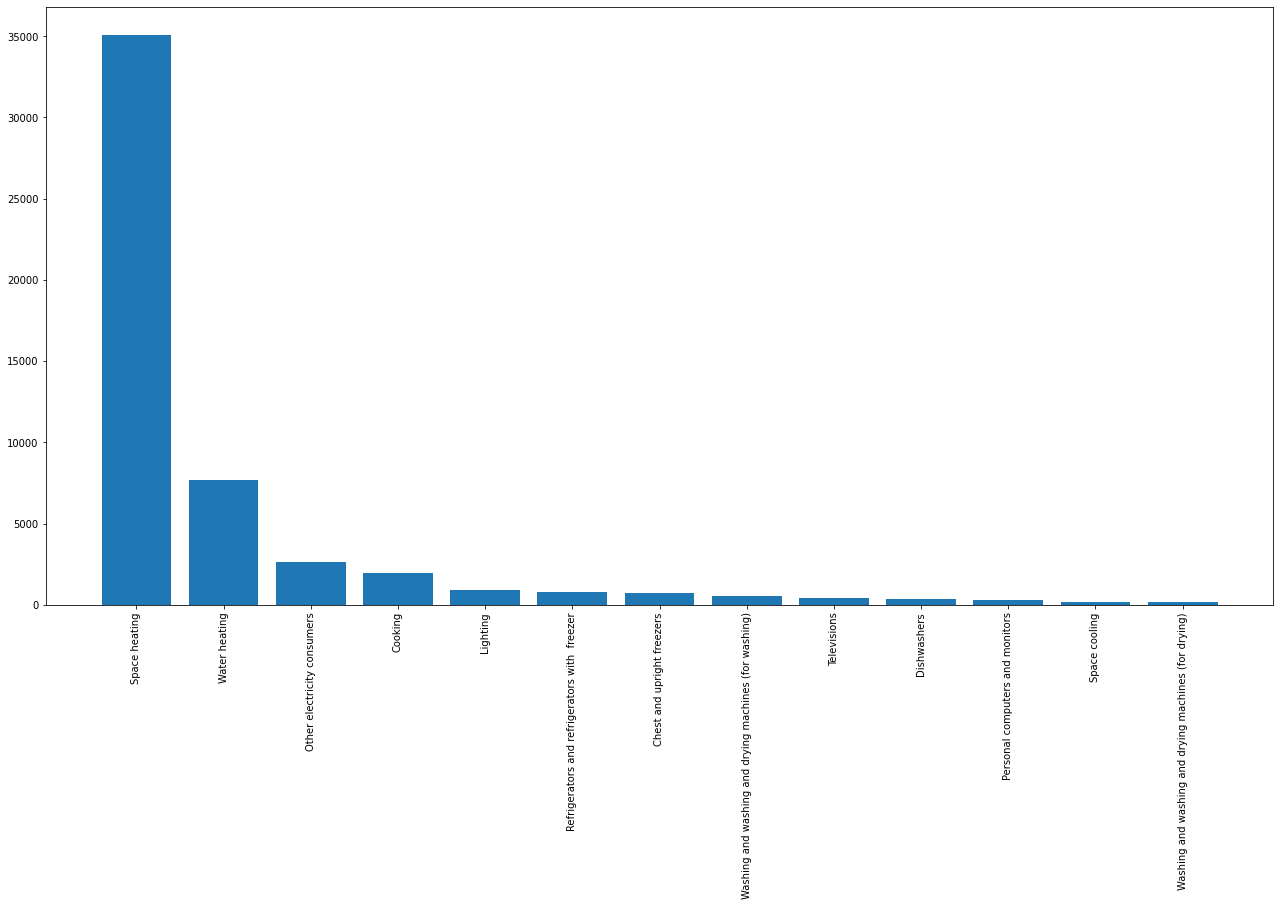

In [105]:
averages = []
transpose = npmat.transpose()
plt.figure(figsize=(22, 11))  
for x in transpose:
    averages.append(np.average(x))

np_names=np.array(names)
np_averages=np.array(averages)
indices = np.argsort(np_averages)[::-1]
plt.xticks(rotation='vertical')
plt.bar(np_names[indices],np_averages[indices])  
plt.show()


#### Which are the 2 biggest consumers of all energy uses by year and how much do they consume?
For this question we will extract the top 2 energy consumers and represent their consumption over the years.
The unit used in the data is TJ (Terajoules).

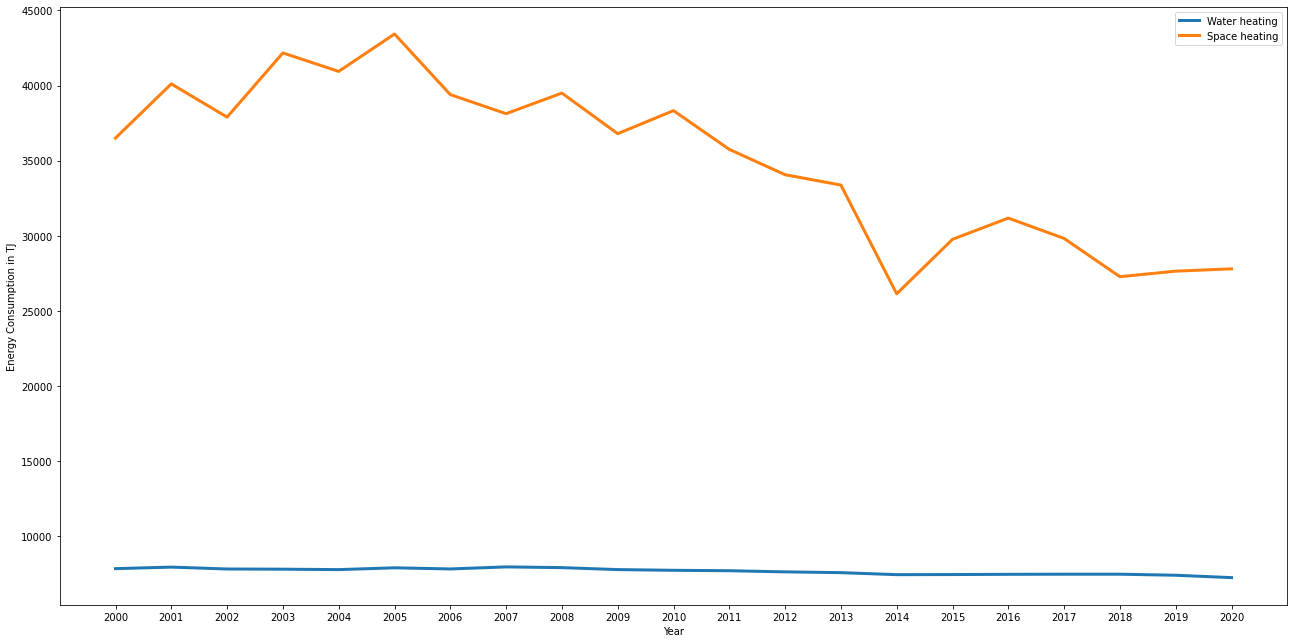

In [106]:

#Make dictionaries with top 2 consumption amounts by year
yearly_app = {}
yearly_cons={}
ct=0

for x in npmat:
    index_cons_max = np.argpartition(x, -2)[-2:]
    yearly_cons[str(2000+ct)]=x[index_cons_max]
    ct+=1


    
years=yearly_cons.keys()
n1=[]
n2=[]
for x in yearly_cons.values():
    n1.append(x[0])
    n2.append(x[1])



plt.figure(figsize=(22, 11))
plt.plot(years,n1,label=names[index_cons_max[0]], linewidth=3.0)
plt.plot(years,n2,label=names[index_cons_max[1]], linewidth=3.0)
plt.xlabel("Year")
plt.ylabel("Energy Consumption in TJ")

plt.legend()
plt.show()

In [107]:
#
usage_file =  open("usage_data.csv", "r")
totals = usage_file.readline().split(",")

year_dict = {}
for name,value in zip(column_names,totals):
    value = int(value)
    title = name.split(" ",1)[1].replace("\"","")
    year = name.split(" ",1)[0].replace("\"","")
    if title!="Energy source - TOTAL":
        if year not in year_dict:
            year_dict[year]=(title, value)
        else:
            if year_dict[year][1] < value:    
                year_dict[year]=(title, value)            

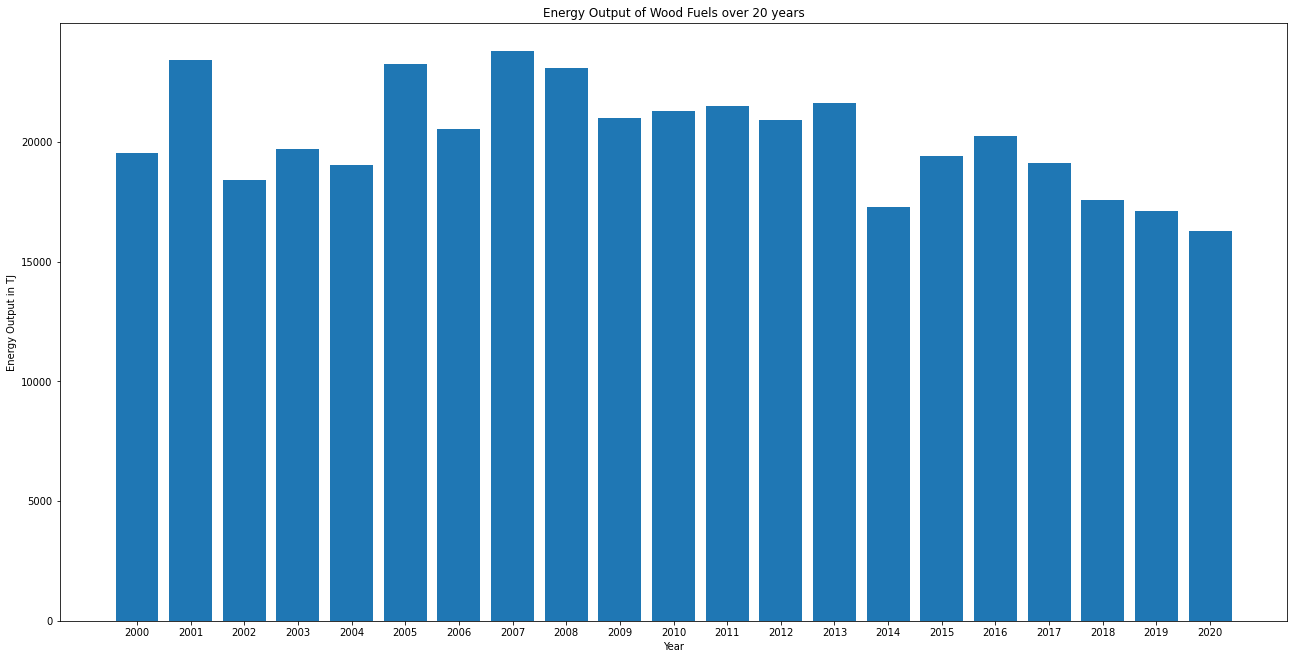

In [108]:
vals=[]
plt.figure(figsize=(22, 11))  
for x in year_dict.values():
    vals.append(x[1])
plt.bar(year_dict.keys(),vals)  
plt.xlabel("Year")
plt.ylabel("Energy Output in TJ")
plt.title("Energy Output of Wood Fuels over 20 years")
plt.show()

In [109]:
year_resources = {}
for name,value in zip(column_names,totals):
    value = int(value)
    title = name.split(" ",1)[1].replace("\"","")
    year = name.split(" ",1)[0].replace("\"","")
    if title!="Energy source - TOTAL" and year in ("2000", "2010", "2020"):
        if year not in year_resources:
            year_resources[year]= [(title, value)]
        else:
            year_resources[year].append((title, value))    

print(year_resources)        

{'2000': [('Extra light fuel oil', 14228), ('Natural gas', 2455), ('Wood fuels', 19524), ('Liquefied petroleum gas', 1889), ('Electricity', 9364), ('Coal', 424), ('District heat', 3955), ('Solar energy', 195), ('Ambient heat', 27)], '2010': [('Extra light fuel oil', 11385), ('Natural gas', 4761), ('Wood fuels', 21293), ('Liquefied petroleum gas', 1529), ('Electricity', 11589), ('Coal', 50), ('District heat', 4245), ('Solar energy', 342), ('Ambient heat', 350)], '2020': [('Extra light fuel oil', 4466), ('Natural gas', 4417), ('Wood fuels', 16283), ('Liquefied petroleum gas', 1093), ('Electricity', 13083), ('Coal', 0), ('District heat', 3140), ('Solar energy', 430), ('Ambient heat', 1979)]}


In [110]:
coal=[]
solar=[]
for i in range(len(year_resources["2000"])):
    resource = year_resources["2000"][i][0]
    y_change = []
    y_change.append((year_resources["2020"][i][1] - year_resources["2000"][i][1])/abs(year_resources["2000"][i][1]) * 100)
    y_change.append((year_resources["2010"][i][1] - year_resources["2000"][i][1])/abs(year_resources["2000"][i][1]) * 100)
    y_change.append((year_resources["2020"][i][1] - year_resources["2010"][i][1])/abs(year_resources["2010"][i][1]) * 100)

    print("%s: \n2000-2020: %.2f%% \n2000-2010: %.2f%% \n2010-2020: %.2f%%\n" % (resource, y_change[0], y_change[1], y_change[2]))
    if resource=="Coal":
        coal=y_change
    elif resource=="Solar energy":
        solar=y_change



Extra light fuel oil: 
2000-2020: -68.61% 
2000-2010: -19.98% 
2010-2020: -60.77%

Natural gas: 
2000-2020: 79.92% 
2000-2010: 93.93% 
2010-2020: -7.23%

Wood fuels: 
2000-2020: -16.60% 
2000-2010: 9.06% 
2010-2020: -23.53%

Liquefied petroleum gas: 
2000-2020: -42.14% 
2000-2010: -19.06% 
2010-2020: -28.52%

Electricity: 
2000-2020: 39.72% 
2000-2010: 23.76% 
2010-2020: 12.89%

Coal: 
2000-2020: -100.00% 
2000-2010: -88.21% 
2010-2020: -100.00%

District heat: 
2000-2020: -20.61% 
2000-2010: 7.33% 
2010-2020: -26.03%

Solar energy: 
2000-2020: 120.51% 
2000-2010: 75.38% 
2010-2020: 25.73%

Ambient heat: 
2000-2020: 7229.63% 
2000-2010: 1196.30% 
2010-2020: 465.43%



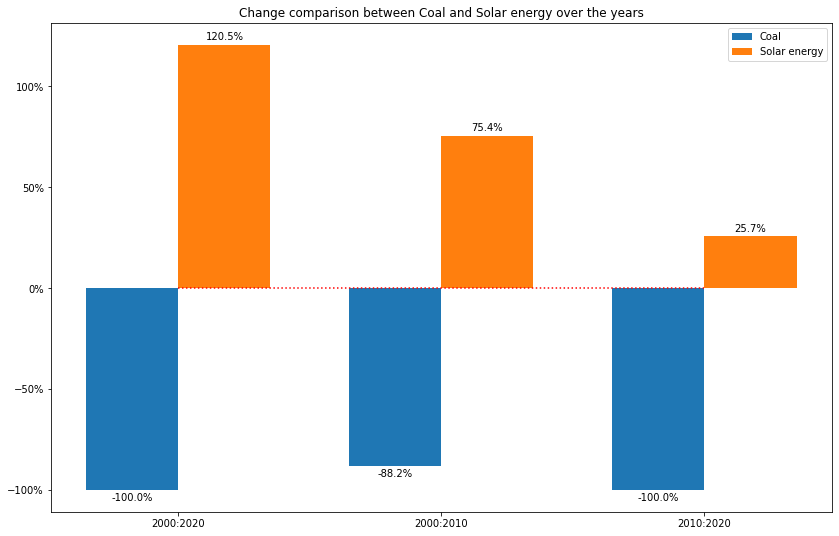

In [126]:
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure


labels = ["2000:2020","2000:2010","2010:2020" ]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 9))

plt.title("Change comparison between Coal and Solar energy over the years")

rects1 = ax.bar(x - width/2, coal, width, label='Coal')
rects2 = ax.bar(x + width/2, solar, width, label='Solar energy')
ax.legend()
ax.set_xticks(x,labels)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.bar_label(rects1,fmt='%.1f%%', padding=3)
ax.bar_label(rects2,fmt='%.1f%%', padding=3)
ax.plot([0,0,0], linestyle="dotted", color="r")
plt.show()